<a href="https://colab.research.google.com/github/cmlohr/research_data/blob/add-license-1/1970s_Boston_Housing_Analysis_Multivariable_Regression_and_Valuation_Mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data is from Boston Massachusetts in the 1970s

### About the Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 
    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.
    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None
    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 263kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data


In [4]:
data = pd.read_csv('boston.csv', index_col=0)

In [5]:
data.shape # 506 data points

(506, 14)

In [6]:
data.columns # column names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [8]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00
505,0.05,0.00,11.93,0.00,0.57,6.03,80.80,2.50,1.00,273.00,21.00,396.90,7.88,11.90


In [9]:
data.count() # number of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [11]:
print(f'Any NaN? {data.isna().values.any()}')

Any NaN? False


In [12]:
print(f'Any dupes? {data.duplicated().values.any()}')

Any dupes? False


In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


#### House Prices

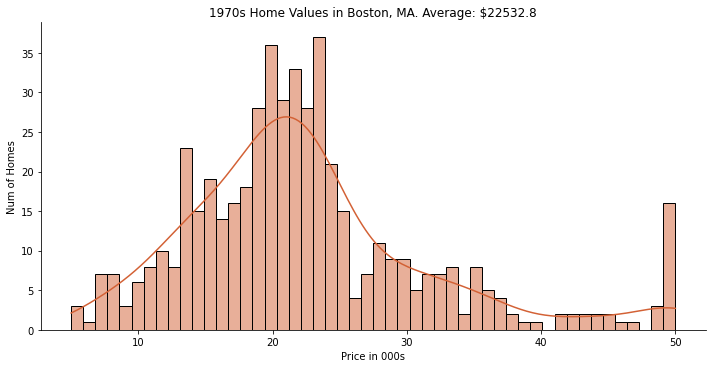

In [14]:
sns.displot(data['PRICE'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#D36135')

plt.title(f'1970s Home Values in Boston, MA. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Num of Homes')

plt.show()

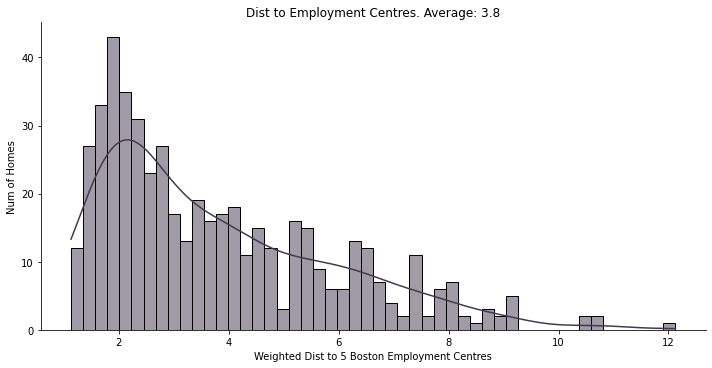

In [15]:
sns.displot(data.DIS, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#443850')

plt.title(f'Dist to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Dist to 5 Boston Employment Centres')
plt.ylabel('Num of Homes')

plt.show()

#### Num of Rooms

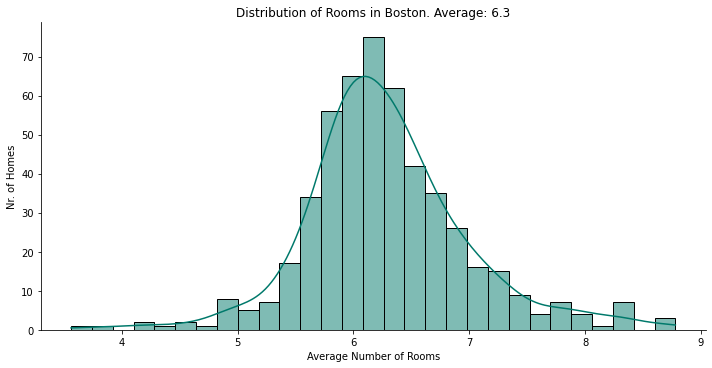

In [16]:
sns.displot(data.RM, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#### Access to Highways 🛣

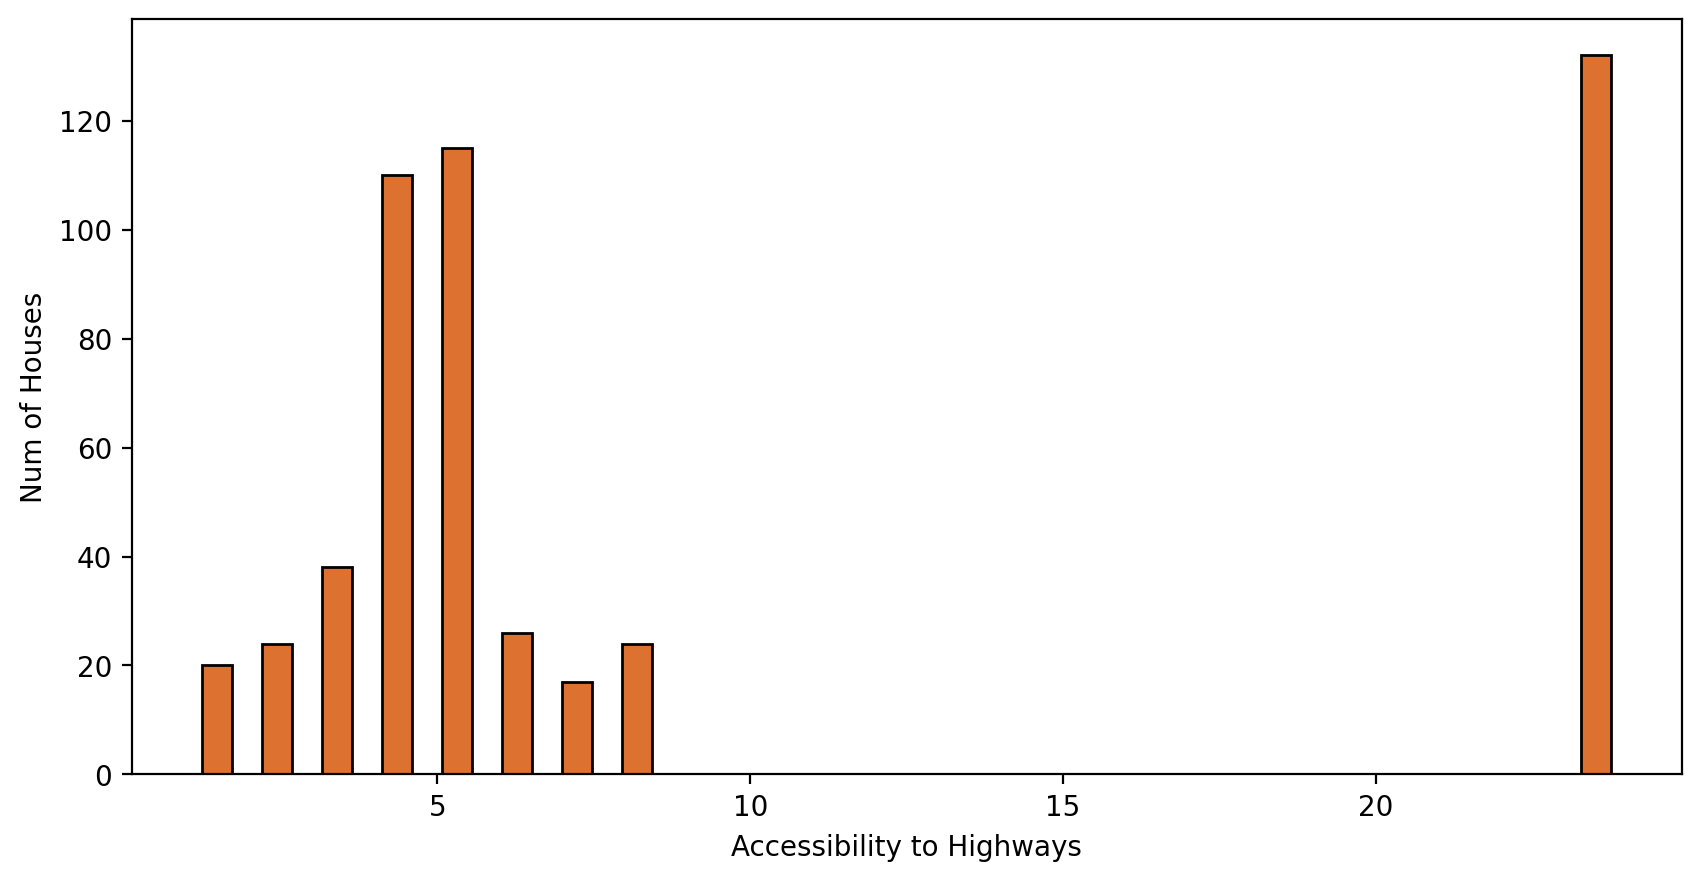

In [17]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(data['RAD'], 
         bins=24, 
         ec='black', 
         color='#DD7230', 
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Num of Houses')
plt.show()

In [18]:
river_access = data['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Is the proptery a river front location?')

bar.update_layout(xaxis_title='Location?', 
                  yaxis_title='Num of Homes',
                  coloraxis_showscale=False)
bar.show()

#Pairplot

Num Of Rooms Valuation
Distance To City Centere
Polution

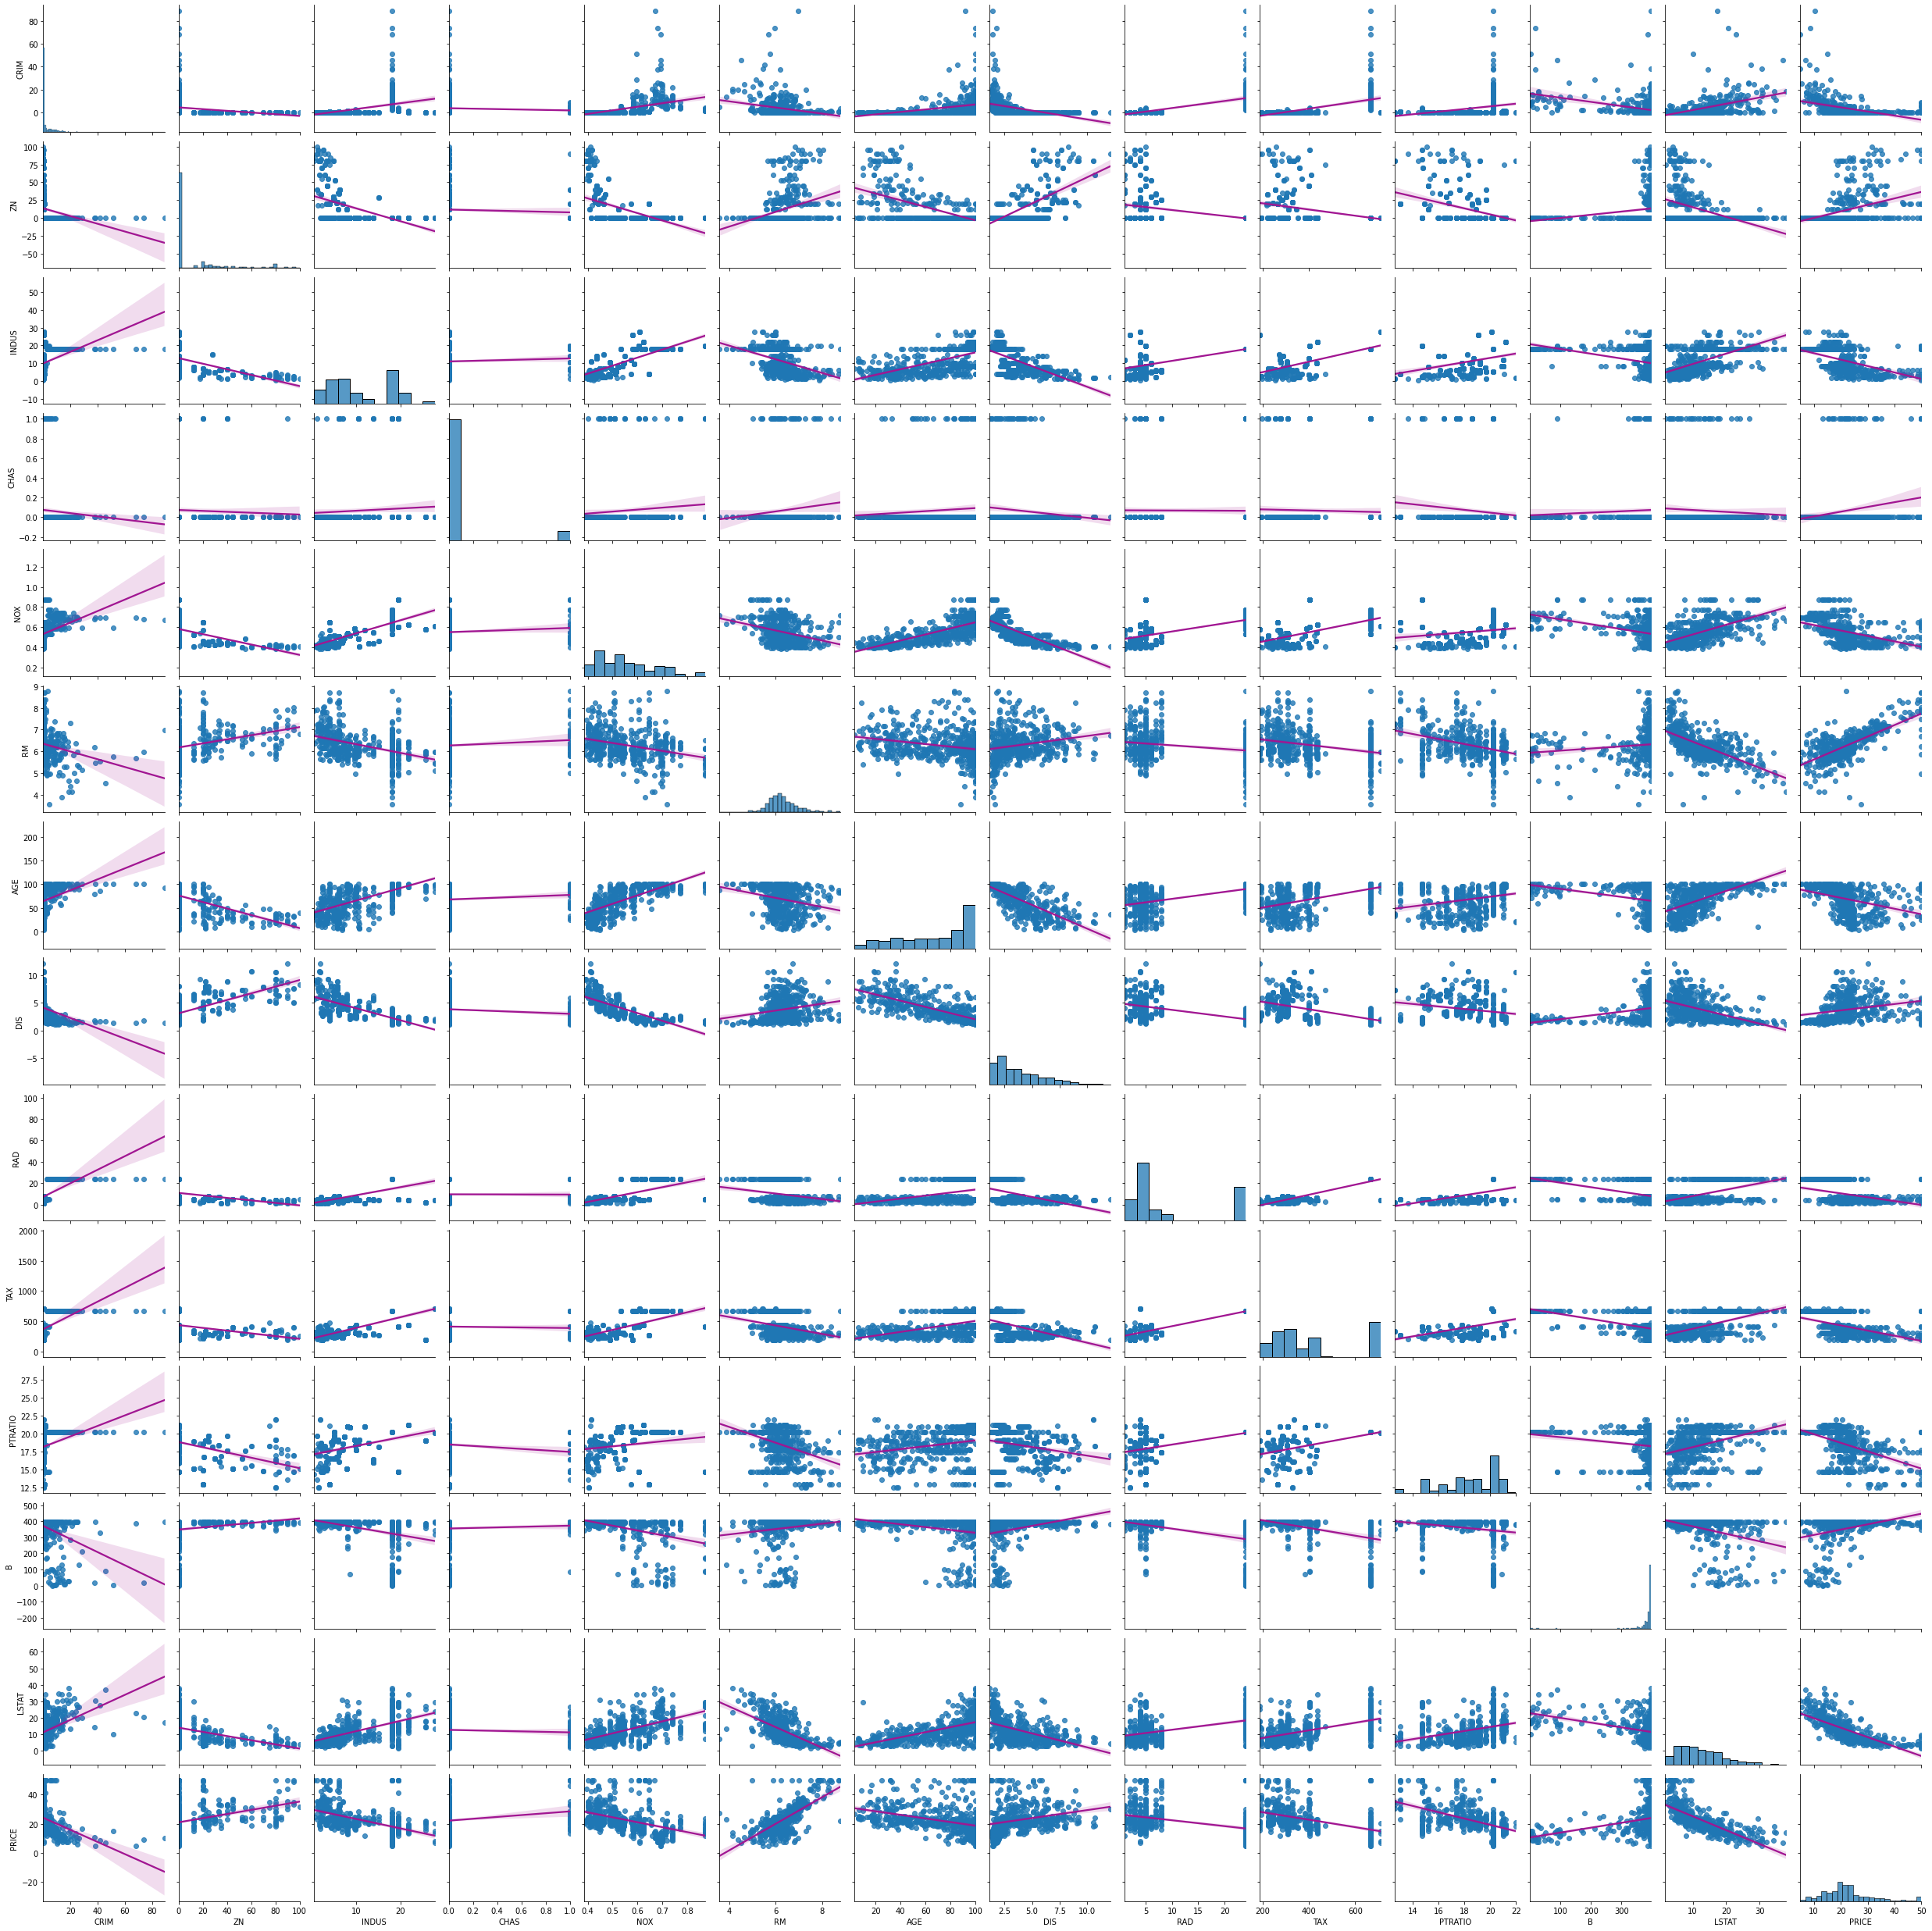

In [20]:
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': '#C5E99B'}})
plt.show()

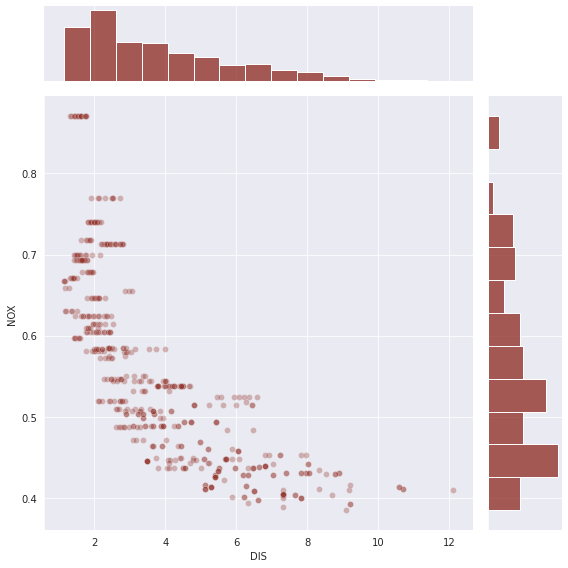

In [21]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['DIS'], 
                y=data['NOX'], 
                height=8, 
                kind='scatter',
                color='#8C271E', 
                joint_kws={'alpha':0.3})

plt.show()

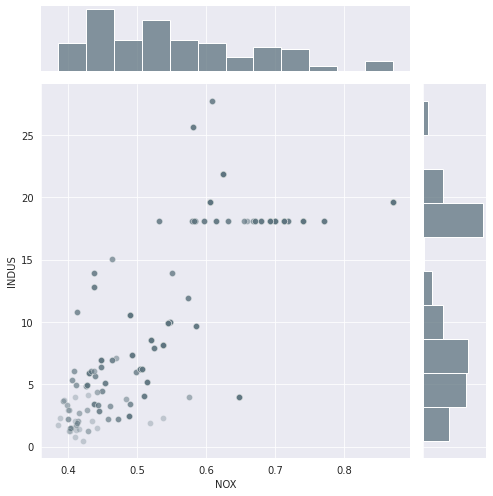

In [23]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.NOX, 
                y=data.INDUS, 
                # kind='hex', 
                height=7, 
                color='#5E747F',
                joint_kws={'alpha':0.3})
plt.show()

#### % of Lower Income Population vs Average Number of Rooms


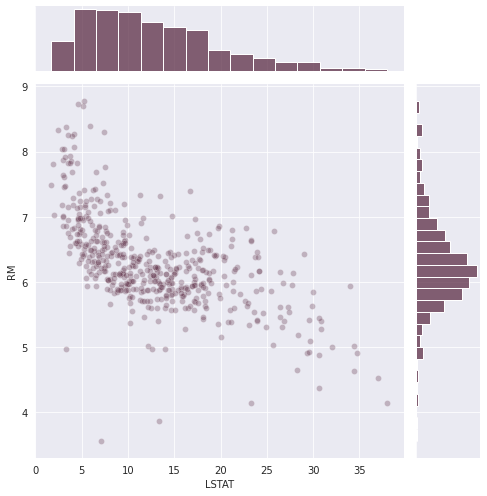

In [24]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['LSTAT'], 
                y=data['RM'], 
                # kind='hex', 
                height=7, 
                color='#5D2E46',
                joint_kws={'alpha':0.3})
plt.show()

#### % of Lower Income Population versus Home Price



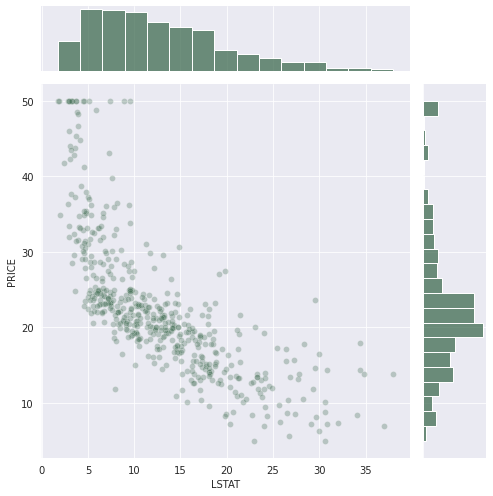

In [25]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.LSTAT, 
                y=data.PRICE, 
                # kind='hex', 
                height=7, 
                color='#3F6C51',
                joint_kws={'alpha':0.3})
plt.show()

#### Number of Rooms versus Home Value

**Challenge** 

Compare RM (number of rooms) with PRICE using Seaborn's `.jointplot()`. You can probably guess how the number of rooms affects home prices. 😊 

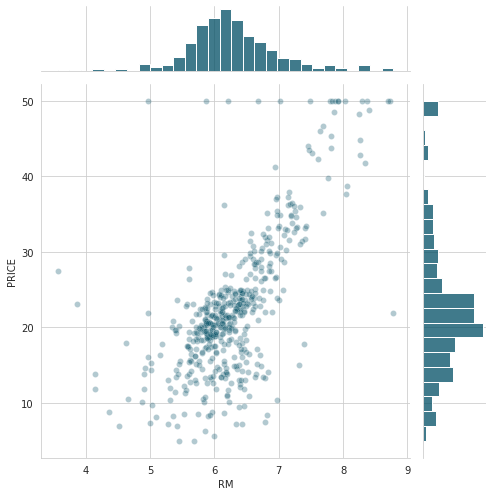

In [29]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.RM, 
                y=data.PRICE, 
                height=7, 
                color='#004E64',
                joint_kws={'alpha':0.3})
plt.show()

# Split Training & Test Dataset



In [30]:
target = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [33]:
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data is the remaining {test_pct:0.3}%.')

Training data is 79.8% of the total data.
Test data is the remaining 20.2%.


# Multivariable Regression


In [34]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.75


### Evaluate the Coefficients of the Model


In [35]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


In [37]:
xtra_room_cost = regr_coef.loc['RM'].values[0] * 1000  
print(f'The price for having an extra room is ${xtra_room_cost:.5}')

The price for having an extra room is $3108.5


In [39]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

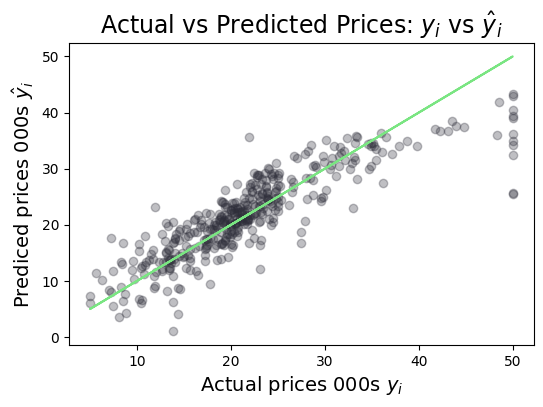

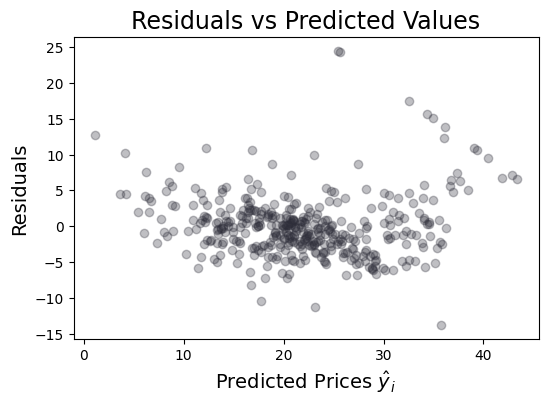

In [41]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='#2E2E3A', alpha=0.3)
plt.plot(y_train, y_train, color='#7AE582')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='#2E2E3A', alpha=0.3)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

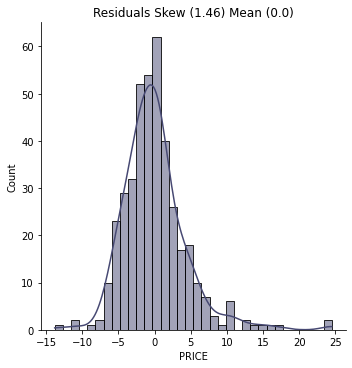

In [43]:
residual_mean = round(residuals.mean(), 2)
residual_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='#474973')
plt.title(f'Residuals Skew ({residual_skew}) Mean ({residual_mean})')
plt.show()

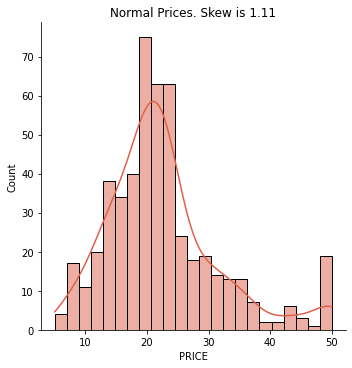

In [44]:
tgt_skew = data['PRICE'].skew()
sns.displot(data['PRICE'], kde='kde', color='#DD614A')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

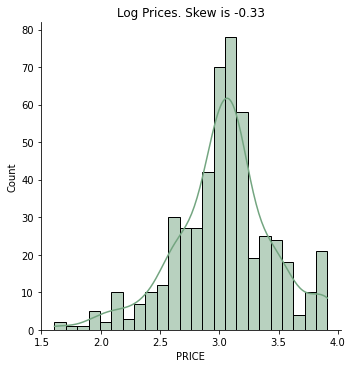

In [46]:
y_log = np.log(data['PRICE'])
sns.displot(y_log, kde=True, color='#73A580')
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

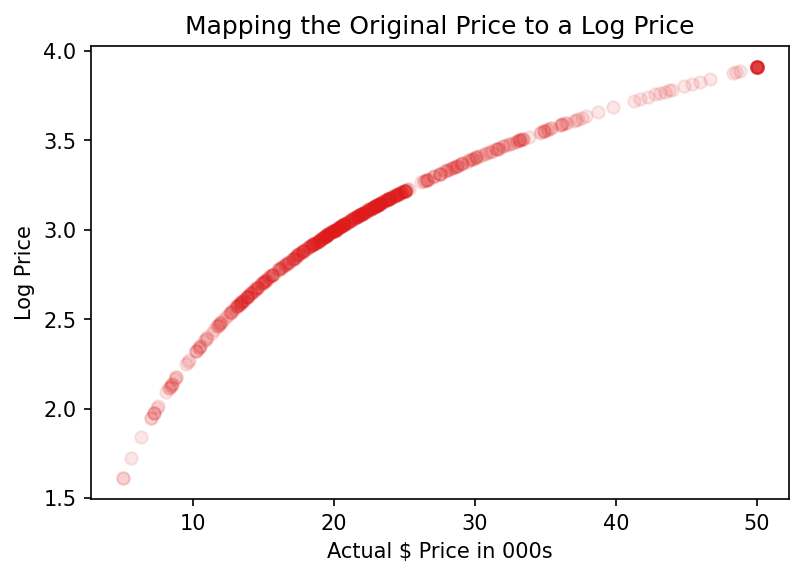

In [49]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE), c='#DE1A1A', alpha=0.1)

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

In [50]:
new_target = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


## Evaluating Coefficients with Log Prices


In [51]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

,coef
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


## Regression with Log Prices & Residual Plots


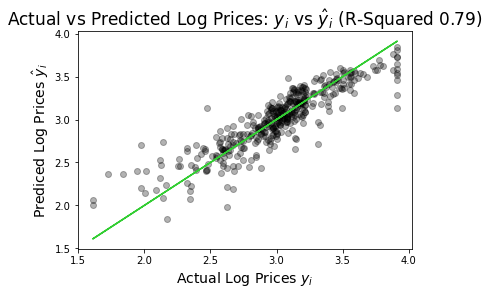

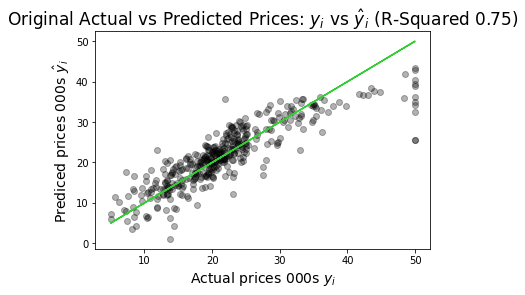

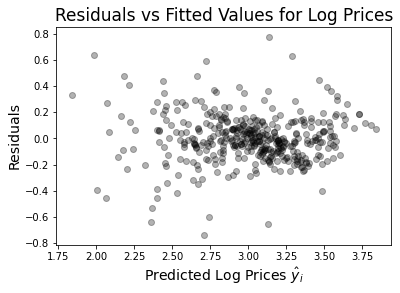

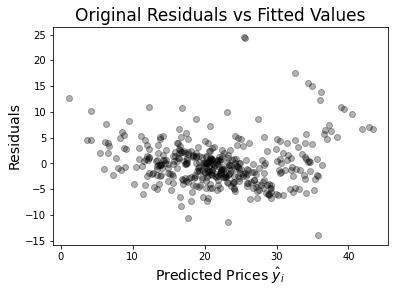

In [53]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(x=log_y_train, y=log_predictions, c='black', alpha=0.3)
plt.plot(log_y_train, log_y_train, color='limegreen')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.scatter(x=y_train, y=predicted_vals, c='black', alpha=0.3)
plt.plot(y_train, y_train, color='limegreen')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log prices)
plt.scatter(x=log_predictions, y=log_residuals, c='black', alpha=0.3)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_vals, y=residuals, c='black', alpha=0.3)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()



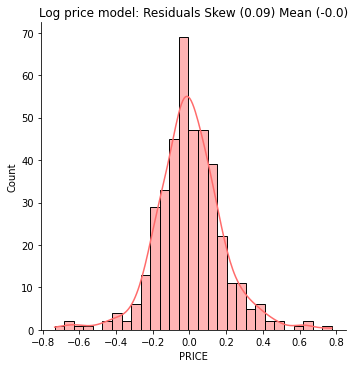

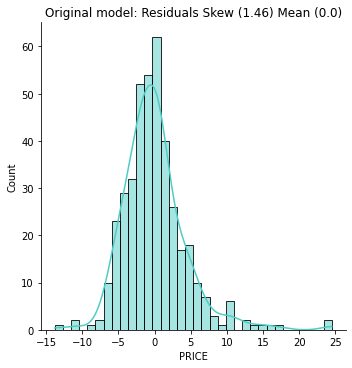

In [54]:
# Distribution of Residuals (log prices) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='#FF6B6B')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='#4ECDC4')
plt.title(f'Original model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Compare Out of Sample Performance


In [55]:
print(f'Og Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

Og Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


# Predict a Property's Value using the Regression Coefficients



In [56]:
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


In [57]:
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate ${log_estimate:.3}')

dollar_est = np.exp(log_estimate) * 1000
print(f'The property estimate ${dollar_est:.6}')

The log price estimate $3.03
The property estimate $20703.2


In [59]:
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [60]:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [61]:
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate ${log_estimate:.3}')

dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be ${dollar_est:.6}')

The log price estimate $3.25
The property is estimated to be $25792.0
